# 2.2 Prepare the Data

In [75]:
import pandas as pd

In [76]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv"

In [77]:
!wget $data

--2025-02-07 19:14:56--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.8’

data.csv.8          100%[===================>]   1.41M  --.-KB/s    in 0.03s   

2025-02-07 19:14:56 (52.7 MB/s) - ‘data.csv.8’ saved [1475504/1475504]



In [78]:
df = pd.read_csv(data)

In [79]:
# normalize the colomns
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [80]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [81]:
# for the data, find the string columns, these will be the ones with dtypes of object
stringIndeces = list(df.dtypes[df.dtypes  == "object"].index)
stringIndeces

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [82]:
for col in stringIndeces:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [83]:

df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 Exploratory Data Analysis

## examine the data

In [84]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()
    

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## Distribution of price

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

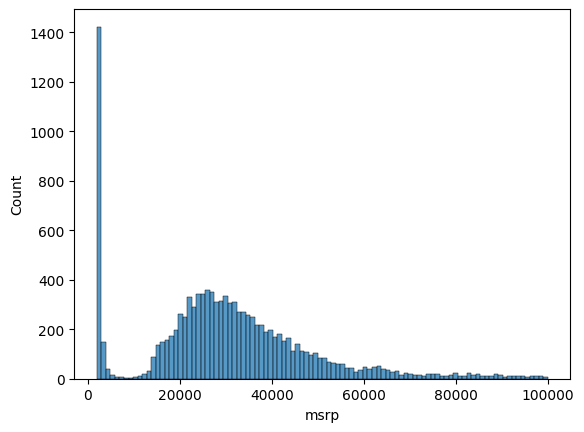

In [86]:
# see dist of prices in histogram
sns.histplot(df.msrp[df.msrp < 100_000], bins=100)

<Axes: xlabel='msrp', ylabel='Count'>

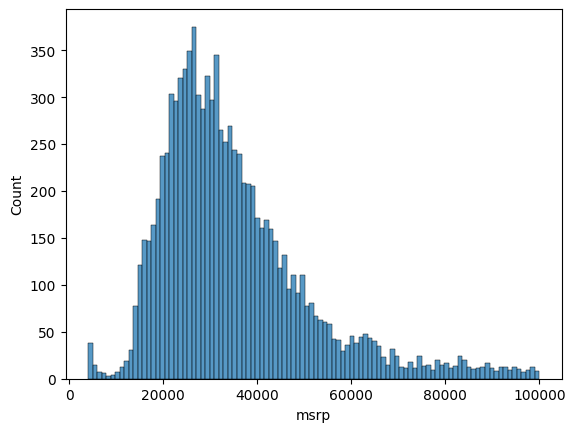

In [87]:
sns.histplot(df.msrp[(df.msrp < 100_000) & (df.msrp > 4000)], bins=100)

In [88]:
# the long-tail distribution is not conducive to ML so we need to convert it to logarithmic scale
# log1p adds 1 to each value we want to log so we don't get a log(0) = undefined
np.log1p([0, 1, 10, 100, 1000, 10_000, 100_000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
        9.21044037, 11.51293546])

In [89]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

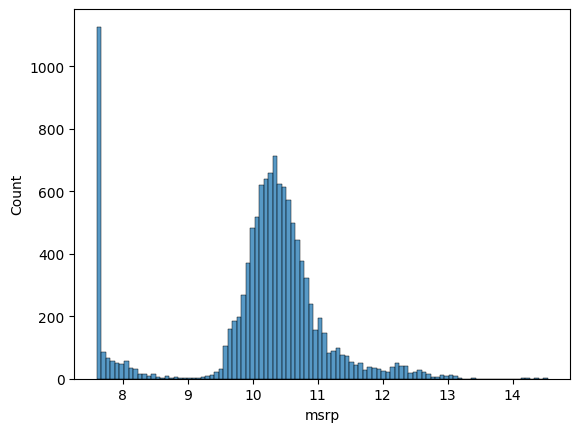

In [90]:
sns.histplot(price_logs, bins=100)

## Missing values

In [91]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up the validation framework

In [92]:
# splitting for train, validation, and test
twenty = int(len(df) * .2)
testSize = len(df) - twenty * 2

In [93]:
# shuffle the data so each bin we create has a random set
# here we get a shuffled array of indeces
idx = np.arange(len(df))
# np.random.seed(2) # if we want to get same shuffle every time
np.random.shuffle(idx)

In [94]:
# now use the shuffled indeces to get the data sets
trainData = df.iloc[idx[:testSize]]
valData = df.iloc[idx[testSize:testSize + twenty]]
testData = df.iloc[idx[testSize+twenty:]]



In [95]:
trainData = trainData.reset_index(drop=True)
valData = valData.reset_index(drop=True)
testData = testData.reset_index(drop=True)

In [96]:
len(trainData), len(valData), len(testData)

(7150, 2382, 2382)

In [97]:
# get the y output
y_train = np.log1p(trainData.msrp.values)
y_val = np.log1p(valData.msrp.values)
y_test = np.log1p(testData.msrp.values)

In [98]:
# !!!!! important !!!!!
# remove the y from the data, otherwise the model would look like it was perfect
del trainData["msrp"]
del testData["msrp"]
del valData["msrp"]

# 2.5 Linear Regression Primer

In [99]:
# linear regression is one model used for ML

In [100]:
w0 = 7.17 # initial weight, aka bias 
w = [.01,.04,.002] # weights
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred += w[j] * xi[j]
    return np.expm1(pred) # because we took the log of msrp to make the curve more normal
    

In [101]:
linear_regression([453,11,86]) # these are three values of one row the instructor chose for demo

np.float64(222347.2221101062)

# Linear Regression Vector Form

In [102]:
# note that the pred += w[j] * xi[j] was simply a dot product and out linear_regression was w0 + the dot product
w_new = [w0] + w # array concatonization

In [103]:
def vect_lin_reg(xi):
    xi = ([1] + xi)
    return np.expm1(np.array(xi).dot(w_new))
    

In [104]:
vect_lin_reg([453,11,86])

np.float64(222347.2221101062)

In [105]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x3 = [1, 453,11,86]
X = np.array([x1,x2,x3])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [106]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

# 2.7 Training the lin reg model ... setting the weights

Xw = y<br/>
X<sup>-1</sup>Xw = X<sup>-1</sup>y<br/>
and since X<sup>-1</sup>X = I then<br/>
w = X<sup>-1</sup>y

But our X matrix is almost never square so we cannot take it's inverse straight-away

So we get the dot product of X<sup>T</sup>X<br/>
And we dot product the other side by X<sup>T</sup> as well (the transpose of X)

Our new equation is now<br/>
w = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y

In [107]:
def train_lin_reg(X, y):
    #ones = np.ones(X.shape[0])
    #X = np.column_stack([ones, X])
    XT = X.T
    XTX = XT.dot(X) # called the Gram Matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv.dot(XT)).dot(y)
    return w_full[0], w_full[1:]
    

In [108]:
# add the 1's to X (for the bias term)
# ones = np.ones(X.shape[0])
# np.column_stack([ones, X])
train_lin_reg(X, w)

(np.float64(-0.03490280151367187),
 array([ 1.25600308e-04, -1.49985981e-03,  5.22662662e-05]))

# 2.8 Car Price Baseline Model

In [109]:
trainData.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [110]:
trainData.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [111]:
# get the only the data that the model needs
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [112]:
# check for missing values and replace with 0. Often using 0 doesn't make sense and maybe we use the min or mode, etc
trainData[base].isnull().sum()

engine_hp           47
engine_cylinders    18
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [113]:
X_train = trainData[base].fillna(0).values
X_train

array([[ 140.,    8.,   22.,   15., 1624.],
       [ 270.,    6.,   32.,   22., 2009.],
       [ 173.,    4.,   26.,   19., 1851.],
       ...,
       [ 162.,    4.,   22.,   17.,  870.],
       [ 138.,    4.,   35.,   26., 1385.],
       [ 160.,    4.,   35.,   26.,  819.]], shape=(7150, 5))

In [114]:
def train_lin_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XT = X.T
    XTX = XT.dot(X) # called the Gram Matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv.dot(XT)).dot(y)
    return w_full[0], w_full[1:]

In [115]:
w0, w = train_lin_reg(X_train, y_train)

In [116]:
w0

np.float64(7.8542289446687565)

In [117]:
w

array([ 9.27357209e-03, -1.30404702e-01,  1.54240534e-02,  1.46480877e-02,
       -8.06843122e-06])

In [118]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 8.65523878, 10.37528336,  9.6013425 , ...,  9.41625595,
        9.52188046,  9.73046578], shape=(7150,))

<Axes: ylabel='Count'>

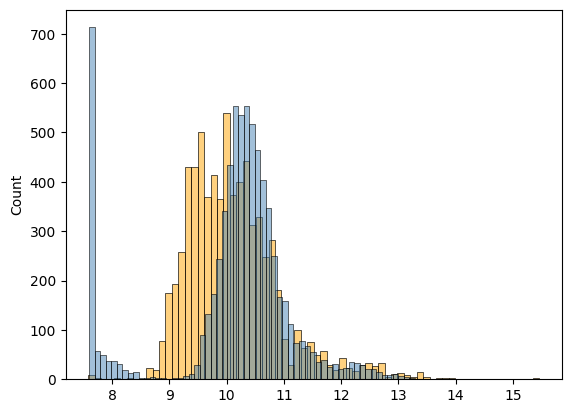

In [119]:
#plot the predictions to compare with actual
sns.histplot(y_pred, color="orange", alpha=0.5, bins=70)
sns.histplot(y_train, color="steelblue", alpha=0.5, bins=70)

# 2.9 RMSE root mean square eval

In [120]:
# we see from the above graph that our predictions are off and we need a way to quantify the difference
# we want the average of the differnces, squared
# here is my attempt
def RMSE(pred, actual):
    return np.sqrt(np.mean((pred - actual)**2))


In [121]:
RMSE(y_pred, y_train)

np.float64(0.7587761054194941)

# 2.10 Validate the Model

In [122]:
# break up the prepare data into a function
def prepare_X(df):
    df_num = df[base].fillna(0)
    return df_num.values

In [123]:
X_train = prepare_X(trainData)
w0, w = train_lin_reg(X_train, y_train)

X_val = prepare_X(valData)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(0.75086064666864)

# 2.11 Simple feature engineering (improve the model)

In [124]:
trainData

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,cadillac,brougham,1990,regular_unleaded,140.0,8.0,automatic,rear_wheel_drive,4.0,luxury,large,sedan,22,15,1624
1,nissan,altima,2016,regular_unleaded,270.0,6.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,32,22,2009
2,dodge,journey,2016,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,26,19,1851
3,hummer,h3,2008,regular_unleaded,242.0,5.0,manual,four_wheel_drive,4.0,luxury,midsize,4dr_suv,18,13,130
4,mercedes-benz,s-class,2016,premium_unleaded_(required),621.0,12.0,automatic,rear_wheel_drive,4.0,"factory_tuner,luxury,high-performance",large,sedan,20,13,617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,captiva_sport,2013,flex-fuel_(unleaded/e85),180.0,4.0,automatic,front_wheel_drive,4.0,"crossover,flex_fuel",midsize,4dr_suv,28,20,1385
7146,audi,a6,2015,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"diesel,luxury",midsize,sedan,38,24,3105
7147,volvo,940,1995,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,wagon,22,17,870
7148,chevrolet,sonic,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,35,26,1385


In [125]:
# we see we left out an important feature, year
trainData.year.max() # we'll use this as our current year since the dataset is old (2017)

np.int64(2017)

In [126]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features].fillna(0)    
    return df_num.values

In [127]:
X_train = prepare_X(trainData)
w0, w = train_lin_reg(X_train, y_train)

X_val = prepare_X(valData)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(0.5153080624136686)

<Axes: ylabel='Count'>

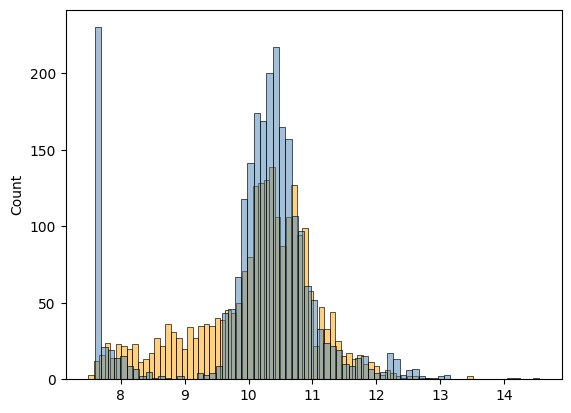

In [128]:
# a lower rmse is better
# now plot the differences again to see the improvement visually
sns.histplot(y_pred, color="orange", alpha=0.5, bins=70)
sns.histplot(y_val, color="steelblue", alpha=0.5, bins=70)

# 2.12 Categorical Variables

In [129]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype("int")
        features.append('num_doors_%s' %v)
                        
    df_num = df[features].fillna(0)    
    return df_num.values

In [130]:
# try it out
X_train = prepare_X(trainData)
w0, w = train_lin_reg(X_train, y_train)

X_val = prepare_X(valData)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(0.5129209063470238)

In [131]:
# didn't help that much. Let's look at make
df.make.value_counts().head(10)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
gmc            515
honda          449
mazda          423
cadillac       397
Name: count, dtype: int64

In [132]:
list(df.make.value_counts().head(10).index)

['chevrolet',
 'ford',
 'volkswagen',
 'toyota',
 'dodge',
 'nissan',
 'gmc',
 'honda',
 'mazda',
 'cadillac']

In [133]:
makes = list(df.make.value_counts().head(10).index)
makes

['chevrolet',
 'ford',
 'volkswagen',
 'toyota',
 'dodge',
 'nissan',
 'gmc',
 'honda',
 'mazda',
 'cadillac']

In [134]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype("int")
        features.append('num_doors_%s' % v)
                        
    for v in makes:
        df['%s' % v] = (df.make == v).astype("int")
        features.append('%s' % v)
                        
    df_num = df[features].fillna(0)    
    return df_num.values

In [135]:
# try it out
X_train = prepare_X(trainData)
w0, w = train_lin_reg(X_train, y_train)

X_val = prepare_X(valData)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(0.49745585221425875)

In [136]:
prepare_X(trainData)

array([[140.,   8.,  22., ...,   0.,   0.,   1.],
       [270.,   6.,  32., ...,   0.,   0.,   0.],
       [173.,   4.,  26., ...,   0.,   0.,   0.],
       ...,
       [162.,   4.,  22., ...,   0.,   0.,   0.],
       [138.,   4.,  35., ...,   0.,   0.,   0.],
       [160.,   4.,  35., ...,   0.,   0.,   0.]], shape=(7150, 19))

In [137]:
trainData.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [138]:
category = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']
categories = {}

In [174]:
for c in category:
    categories[c] = list(df[c].value_counts().head(10).index)

In [175]:
categories

{'make': ['chevrolet',
  'ford',
  'volkswagen',
  'toyota',
  'dodge',
  'nissan',
  'gmc',
  'honda',
  'mazda',
  'cadillac'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel',
  'electric',
  'flex-fuel_(premium_unleaded_required/e85)',
  'flex-fuel_(premium_unleaded_recommended/e85)',
  'flex-fuel_(unleaded/natural_gas)',
  'natural_gas'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback',
  'performance',
  'crossover,luxury',
  'luxury,high-performance',
  'exotic,high-performance',
  'hatchback,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible'

In [176]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype("int")
        features.append('num_doors_%d' % v)

    for cat, values in categories.items():
        for value in values:
            df['%s_%s' % (cat, value)] = (df[cat] == value).astype("int")
            features.append('%s_%s' % (cat, value))
                        
    df_num = df[features].fillna(0)    
    return df_num.values

In [177]:
# try it out
X_train = prepare_X(trainData)
w0, w = train_lin_reg(X_train, y_train)

X_val = prepare_X(valData)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(66.6670092866562)

In [178]:
w0

np.float64(5831088481928964.0)

In [179]:
# woah! Much worse. And we see the w0 (and some w's) are very large numbers

# 2.13 Regularization

In [180]:
# the problem was with the Gram Matrix. Sometime the transpose will not work. Thus usually happens when there are duplicate values in some columns.
# Here is an example
Z = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5]
]

In [181]:
Z = np.array(Z)
Z

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [182]:
# note the duplicates in columns 1 and 2
# compute the Gram Matrix
GM = Z.T.dot(Z)
GM

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [183]:
# since at least one columne (in this case 1 and 2) are linear combinations of other columns we cannot take the inverse, it does not exist
np.linalg.inv(GM)

LinAlgError: Singular matrix

In [184]:
# to get rid of the problem we can add a small value to the diagonal of the Gram Matrix
GM = GM + 0.0001 * np.eye(3)
GM

array([[140.0001, 111.    , 111.    ],
       [111.    , 108.0001, 108.    ],
       [111.    , 108.    , 108.0001]])

In [185]:
np.linalg.inv(GM)

array([[ 3.85849815e-02, -1.98283841e-02, -1.98283841e-02],
       [-1.98283841e-02,  5.00001250e+03, -4.99998750e+03],
       [-1.98283841e-02, -4.99998750e+03,  5.00001250e+03]])

In [186]:
# so let's regularize our function
def train_lin_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XT = X.T
    XTX = XT.dot(X) # called the Gram Matrix
    # add our regularization variable to the diagonal
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv.dot(XT)).dot(y)
    return w_full[0], w_full[1:]

In [187]:
# try it out
X_train = prepare_X(trainData)
w0, w = train_lin_regression_reg(X_train, y_train)

X_val = prepare_X(valData)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

np.float64(0.444381696968804)

# 2.14 Tuning the modes (finding best Regularization value)

In [188]:
for r in [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(trainData)
    w0, w = train_lin_regression_reg(X_train, y_train, r)
    X_val = prepare_X(valData)
    y_pred = w0 + X_val.dot(w)
    score = RMSE(y_val, y_pred)
    print(r, w0, score)

0 5831088481928964.0 66.6670092866562
1e-05 6.053447221441612 0.44438109591035524
0.0001 6.053308069417931 0.444381139858585
0.001 6.050750330907576 0.444381696968804
0.01 6.026057775179965 0.4443874443530035
0.1 5.841020596095054 0.4444607440595536
1 5.203784150206203 0.44556235886520634
10 4.166441449389553 0.45733079466653


In [189]:
# for the current random set of data this one appears best
# 0.01 6.297750595972611 0.46480887485278427

# 2.15 Train the final model

In [190]:
# we use the full train + val set for final training
fullTrainData = pd.concat([trainData, valData])
fullTrainData = fullTrainData.reset_index(drop=True)

In [191]:
X_fullTrain = prepare_X(fullTrainData)

In [192]:
y_fullTrain = np.concatenate([y_train, y_val])

In [193]:
w0, w = train_lin_regression_reg(X_fullTrain, y_fullTrain, 0.01)

In [194]:
w0, w

(np.float64(6.08676859775198),
 array([ 1.12042559e-03,  1.05945009e-01, -7.97731995e-03, -8.53461667e-03,
        -3.97078070e-05, -9.91582078e-02, -4.76821530e-01, -6.07635010e-01,
        -3.02081209e-01, -4.53368137e-02,  1.29031229e-01, -1.24487128e-02,
        -1.05021869e-01, -1.18841898e-01, -2.23054251e-01, -1.00640950e-02,
         2.11006953e-02,  2.21142355e-02,  2.24110647e-01, -4.02711735e-01,
         1.37484201e-01, -2.21957990e-01, -5.33889397e-01, -6.05380124e-02,
         1.64227595e+00,  1.39014065e-01, -1.15317326e-01, -1.67574476e-01,
        -2.48196735e-01,  1.29768555e+00,  1.11403477e+00,  1.31000257e+00,
         1.57443514e+00,  7.90638337e-01,  1.51936055e+00,  1.48358617e+00,
         1.54226260e+00,  1.54156396e+00, -1.01172679e-01,  1.16442414e-01,
        -1.06896846e-01, -1.03001567e-01, -1.40195985e-01, -7.76724813e-02,
        -1.06740504e-01, -3.11675063e-02,  5.73341378e-01, -1.02413227e-01,
         2.09065767e+00,  1.99562519e+00,  2.00049039e+00

In [195]:
# now apply this to our test data set
X_test = prepare_X(testData)
y_pred = w0 + X_test.dot(w)

RMSE(y_test, y_pred)

np.float64(0.4470139051002729)

<Axes: ylabel='Count'>

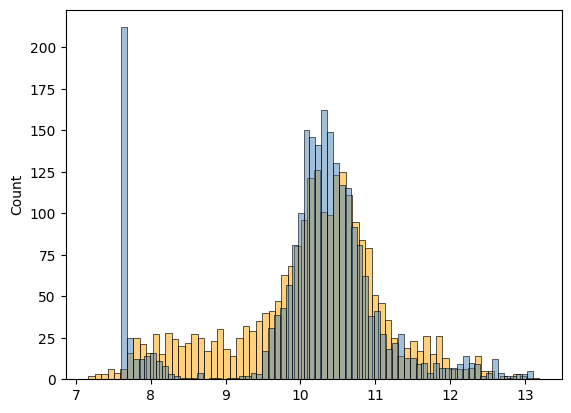

In [196]:
sns.histplot(y_pred, color="orange", alpha=0.5, bins=70)
sns.histplot(y_test, color="steelblue", alpha=0.5, bins=70)

In [197]:
car = testData.iloc[20].to_dict()
car

{'make': 'volkswagen',
 'model': 'jetta_sportwagen',
 'year': 2014,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 170.0,
 'engine_cylinders': 5.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'wagon',
 'highway_mpg': 30,
 'city_mpg': 23,
 'popularity': 873}

In [198]:
df_single = pd.DataFrame([car])
df_single

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,jetta_sportwagen,2014,regular_unleaded,170.0,5.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,30,23,873


In [199]:
X_single = prepare_X(df_single)
y_pred = w0 + X_single.dot(w)
"Predicted value = " + str(np.expm1(y_pred[0]).round(2))

'Predicted value = 31921.46'

In [200]:
"Actual: " + str(np.expm1(y_test[20]).round(2))

'Actual: 22095.0'